## Moving Averages and Their Applications in Data Filtering

### Introduction

Moving averages are a popular and widely-used method for smoothing out short-term fluctuations in data and highlighting longer-term trends. In this notebook, we will explore different types of moving averages, their applications in financial markets, and how they can be used to make better decisions.

We will cover the following topics:
1. **Simple Moving Average (SMA)**
2. **Exponential Moving Average (EMA)**
3. **Weighted Moving Average (WMA)**
4. **Applications in Financial Markets**
5. **Comparative Analysis**
6. **Signal Processing**
7. **Backtesting**



### Step 1: Importing Libraries
Import the necessary libraries for data analysis and visualization.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

### 2. Simple Moving Average (SMA)
The next step will be incorporating the SMA and fetching stock data for visualization.

A Simple Moving Average (SMA) is a statistical measure used in financial analysis to smooth out price data by creating a constantly updated average price. It is calculated by adding the prices (such as closing prices) of an asset over a specific number of periods and then dividing by the number of periods. This helps to identify trends by filtering out short-term fluctuations and highlighting longer-term movements. The formula for SMA is:

SMA = frac{\sum_{i=1}^{n} P_i}{n} 

where P_i represents the price at each period i and n is the number of periods considered.

[*********************100%%**********************]  1 of 1 completed


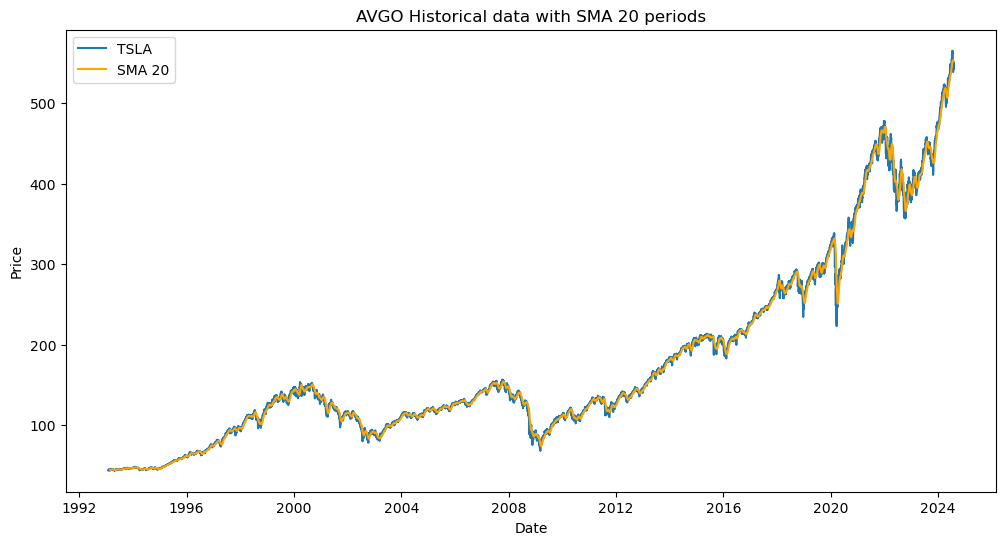

In [12]:
# Fetching the historical data for Broadcom (SPY) as an example
ticker = 'SPY'
data = yf.download(ticker, period='max')
prices = data['Close']

## Simple Moving Average (SMA)
"""
The Simple Moving Average (SMA) is the unweighted mean of the previous n data points. It is the most basic form of moving average used in time series analysis.
"""

### Calculation
window_size = 20
sma = prices.rolling(window=window_size).mean()

### Plotting
plt.figure(figsize=(12, 6))
plt.plot(prices.index, prices, label='TSLA')
plt.plot(sma.index, sma, label=f'SMA {window_size}', color='orange')
plt.title(f'AVGO Historical data with SMA {window_size} periods')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


### 3. Exponential Moving Average
The Exponential Moving Average (EMA) is a type of moving average that gives more weight to recent prices, making it more responsive to new information compared to the Simple Moving Average (SMA). This responsiveness is achieved by applying a multiplier to the most recent price data points.

The formula for calculating the EMA is:

EMA_t = frac{P_t - EMA_{t-1}}{k+1} + EMA_{t-1}

where:
- EMA_t is the EMA at time period t
- P_t is the price at time period t
- EMA_{t-1} is the EMA of the previous period
- k is the smoothing factor, calculated as k = n - 1, where n is the number of periods

The smoothing factor alpha is often expressed as:

alpha = frac{2}{n + 1}

This formula ensures that the EMA reacts more significantly to recent price changes, making it a useful tool for identifying short-term trends in financial markets.

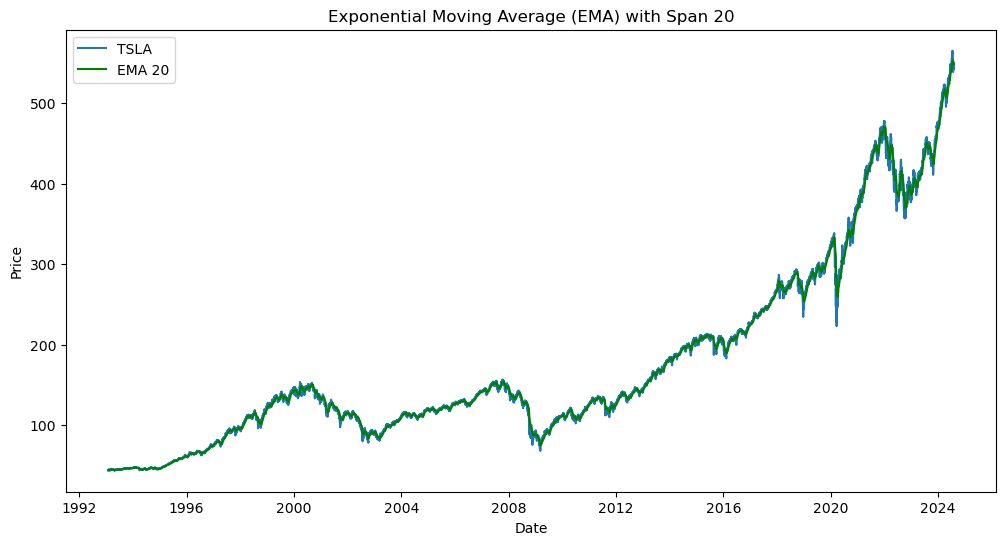

In [13]:
## Exponential Moving Average (EMA)
"""
The Exponential Moving Average (EMA) gives more weight to recent data points, making it more responsive to new information compared to the SMA. The weighting decreases exponentially.
"""

### Calculation
span = 20
ema = prices.ewm(span=span, adjust=False).mean()

### Plotting
plt.figure(figsize=(12, 6))
plt.plot(prices.index, prices, label='TSLA')
plt.plot(ema.index, ema, label=f'EMA {span}', color='green')
plt.title(f'Exponential Moving Average (EMA) with Span {span}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


### Weighted Moving Average (WMA)
The Weighted Moving Average (WMA) is a type of moving average that assigns different weights to each data point in the period, giving more importance to certain points, typically the more recent ones. Unlike the Simple Moving Average (SMA), which gives equal weight to all data points, the WMA emphasizes the most recent prices more heavily, making it more responsive to new information.

The formula for calculating the WMA is:

WMA = frac{\sum_{i=1}^{n} (w_i \cdot P_i)}{{i=1}^{n} w_i}

where:
- P_i represents the price at period i
- w_i  represents the weight assigned to period i 
- n is the number of periods considered

In a typical WMA, the weights decrease linearly, so the most recent price is multiplied by \( n \), the second most recent by \( n-1 \), and so on, down to 1 for the oldest price. For example, if using a 5-period WMA, the weights would be 5, 4, 3, 2, and 1.

This method provides a more accurate reflection of recent price trends compared to the SMA, making it useful for short-term trading strategies.

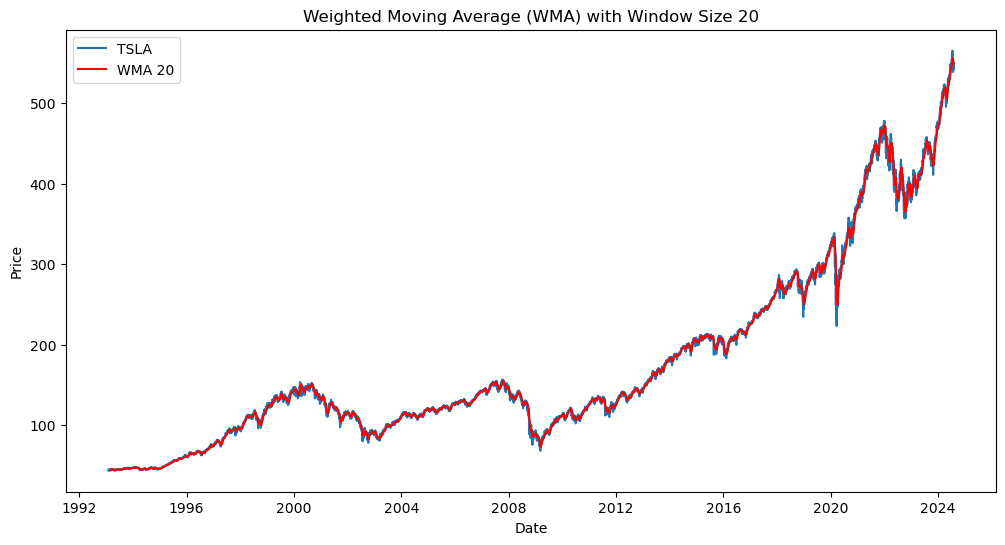

In [14]:
## Weighted Moving Average (WMA)
"""
The Weighted Moving Average (WMA) assigns a heavier weighting to more recent data points. The weights are linearly decreasing over the data points within the window.
"""

### Calculation
def weighted_moving_average(data, window):
    weights = np.arange(1, window + 1)
    wma = data.rolling(window).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)
    return wma

window_size = 20
wma = weighted_moving_average(prices, window_size)

### Plotting
plt.figure(figsize=(12, 6))
plt.plot(prices.index, prices, label='TSLA')
plt.plot(wma.index, wma, label=f'WMA {window_size}', color='red')
plt.title(f'Weighted Moving Average (WMA) with Window Size {window_size}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## Applications in Financial Markets

- **Trend Identification**
Moving averages help in identifying the direction of a trend. For example, if the stock price is above its moving average, it is generally considered to be in an uptrend.

- **Support and Resistance**
Moving averages can act as support during uptrends and resistance during downtrends. Traders often use moving averages to identify potential buy or sell points.

- **Moving Average Crossovers**
A common trading strategy is to use moving average crossovers. For example, a bullish signal is generated when a short-term moving average crosses above a long-term moving average (Golden Cross), and a bearish signal is generated when it crosses below (Death Cross).


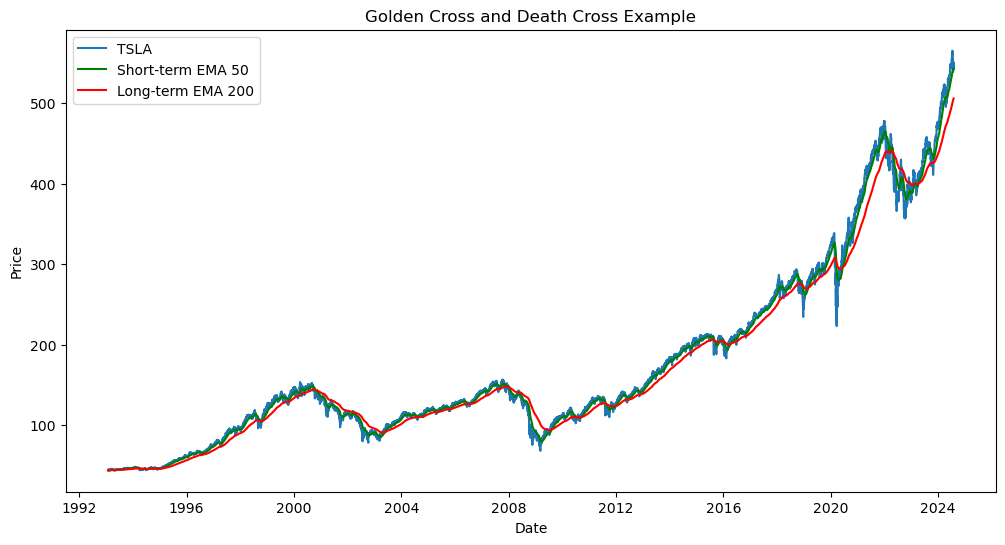

In [15]:
# Calculate short-term and long-term EMAs
short_term_span = 50
long_term_span = 200
short_term_ema = prices.ewm(span=short_term_span, adjust=False).mean()
long_term_ema = prices.ewm(span=long_term_span, adjust=False).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(prices.index, prices, label='TSLA')
plt.plot(short_term_ema.index, short_term_ema, label=f'Short-term EMA {short_term_span}', color='green')
plt.plot(long_term_ema.index, long_term_ema, label=f'Long-term EMA {long_term_span}', color='red')
plt.title('Golden Cross and Death Cross Example')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Interactive Widgets

In [16]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define widgets
window_slider = widgets.IntSlider(value=20, min=5, max=200, step=1, description='Window Size:')
span_slider = widgets.IntSlider(value=20, min=5, max=200, step=1, description='Span:')
ticker_input = widgets.Text(value='SPY', description='Ticker:')

# Create an interactive plot function
def update_plot(ticker, window_size, span):
    clear_output(wait=True)
    
    # Fetch the data
    data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
    prices = data['Close']
    
    # Calculate moving averages
    sma = prices.rolling(window=window_size).mean()
    ema = prices.ewm(span=span, adjust=False).mean()
    wma = weighted_moving_average(prices, window_size)
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(prices.index, prices, label='Original Prices')
    plt.plot(sma.index, sma, label=f'SMA {window_size}', color='orange')
    plt.plot(ema.index, ema, label=f'EMA {span}', color='green')
    plt.plot(wma.index, wma, label=f'WMA {window_size}', color='red')
    plt.title(f'Moving Averages for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Display widgets and set up interaction
widgets.interactive(update_plot, ticker=ticker_input, window_size=window_slider, span=span_slider)



interactive(children=(Text(value='SPY', description='Ticker:'), IntSlider(value=20, description='Window Size:'…

### Backtesting

[*********************100%%**********************]  1 of 1 completed


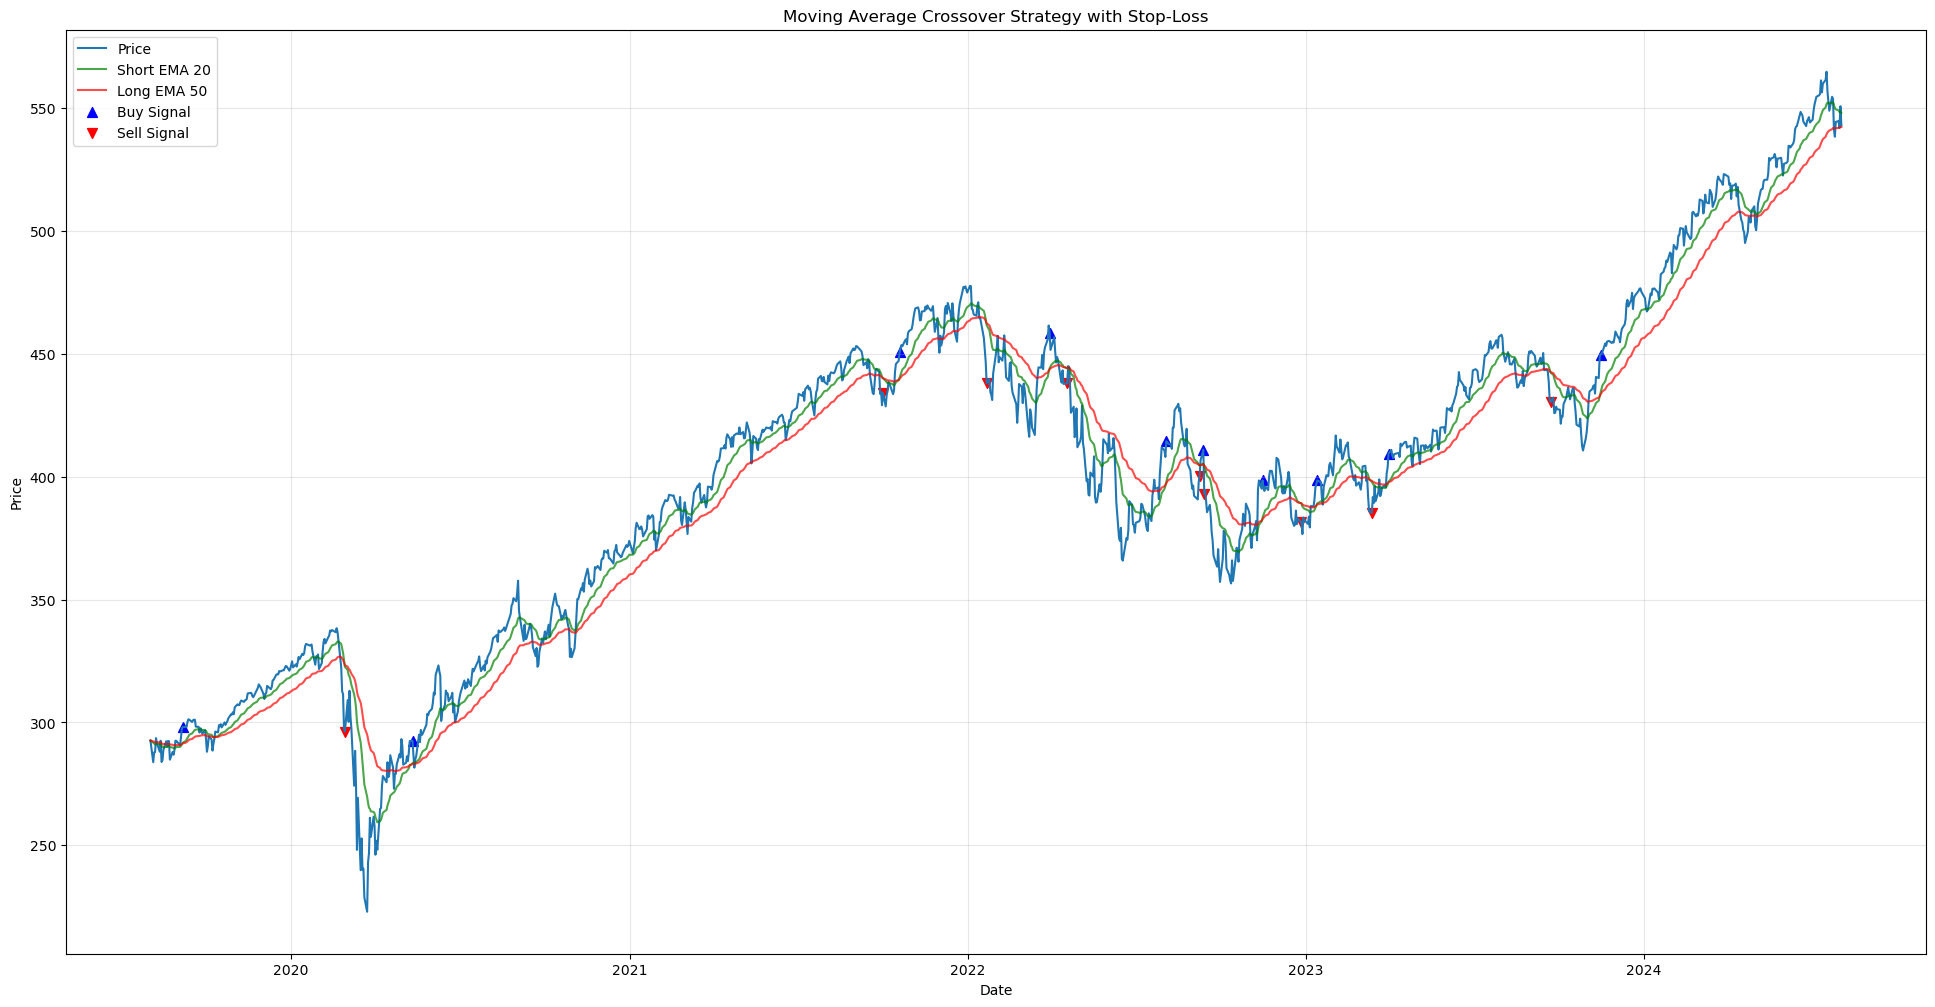

In [17]:
def backtest_moving_average_crossover(prices, short_window, long_window, stop_loss_percent=5):
    signals = pd.DataFrame(index=prices.index)
    signals['price'] = prices
    signals['short_ema'] = prices.ewm(span=short_window, adjust=False).mean()
    signals['long_ema'] = prices.ewm(span=long_window, adjust=False).mean()
    
    # Generate trading signals (1 = buy, 0 = hold, -1 = sell)
    signals['signal'] = 0.0
    signals.iloc[short_window:, signals.columns.get_loc('signal')] = np.where(
        signals['short_ema'].iloc[short_window:] > signals['long_ema'].iloc[short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()

    # Initiate positions according to signals and apply stop-loss
    signals['holdings'] = signals['signal']
    stop_loss = None

    for i in range(1, len(signals)):
        if signals['positions'].iloc[i] == 1.0:
            stop_loss = signals['price'].iloc[i] * (1 - stop_loss_percent / 100)
        elif signals['positions'].iloc[i] == -1.0 or (stop_loss is not None and signals['price'].iloc[i] < stop_loss):
            signals['holdings'].iloc[i] = 0
            stop_loss = None
        else:
            signals['holdings'].iloc[i] = signals['holdings'].iloc[i-1]

    # Calculate returns as the percentage change in price
    signals['returns'] = signals['price'].pct_change()
    
    # Calculate the strategy's returns
    signals['strategy_returns'] = signals['returns'] * signals['holdings'].shift(1)

    # Calculate cumulative returns
    signals['cumulative_returns'] = (1 + signals['strategy_returns']).cumprod()

    return signals

# Example backtest with real data
ticker = 'SPY'
data = yf.download(ticker, period='5y')
prices = data['Close']

short_window = 20
long_window = 50
signals = backtest_moving_average_crossover(prices, short_window, long_window, stop_loss_percent=10)

# Plotting the strategy
plt.figure(figsize=(24, 12))
plt.plot(signals.index, signals['price'], label='Price', alpha=1)
plt.plot(signals.index, signals['short_ema'], label=f'Short EMA {short_window}', color='green', alpha=0.7)
plt.plot(signals.index, signals['long_ema'], label=f'Long EMA {long_window}', color='red', alpha=0.7)
plt.scatter(signals[signals['positions'] == 1.0].index, 
            signals['price'][signals['positions'] == 1.0], 
            marker='^', color='blue', s=50, label='Buy Signal', alpha=1)
plt.scatter(signals[signals['positions'] == -1.0].index, 
            signals['price'][signals['positions'] == -1.0], 
            marker='v', color='red', s=50, label='Sell Signal', alpha=1)
plt.title('Moving Average Crossover Strategy with Stop-Loss')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Performance Metrics

In [18]:
# Calculate performance metrics
def calculate_performance_metrics(signals):
    total_return = signals['cumulative_returns'].iloc[-1] - 1
    annualized_return = signals['strategy_returns'].mean() * 252
    annualized_volatility = signals['strategy_returns'].std() * np.sqrt(252)
    sharpe_ratio = annualized_return / annualized_volatility if annualized_volatility != 0 else np.nan
    
    metrics = {
        'Total Return': total_return,
        'Annualized Return': annualized_return,
        'Annualized Volatility': annualized_volatility,
        'Sharpe Ratio': sharpe_ratio
    }
    
    return metrics

# Calculate and display metrics
metrics = calculate_performance_metrics(signals)
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])
print(metrics_df)

                          Value
Total Return           0.486902
Annualized Return      0.087572
Annualized Volatility  0.126483
Sharpe Ratio           0.692359
